<a href="https://colab.research.google.com/github/Mineth03/Client-Predicting/blob/Preprocessing/Preprocessing/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Format the csv file into correct format**

In [60]:
file_path = 'RawDataset.csv'
# Split columns
data = pd.read_csv(file_path, delimiter=';')

output_path = 'CleanedDataset.csv'
data.to_csv(output_path, index=False)

print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

# **Data analysis**

## **Column explenations**

In [61]:
data = pd.read_csv('CleanedDataset.csv')

# Function to explain a column
def explain_column(column_name, data):
    col_data = data[column_name]
    col_dtype = col_data.dtype
    explanation = f"Column Name: {column_name}\n"
    explanation += f"Data Type: {col_dtype}\n"

    if col_dtype in ['int64', 'float64']:
        explanation += f"- Contains numerical data.\n"
        explanation += f"- Unique Values Count: {col_data.nunique()}\n"
    elif col_dtype in ['object', 'category']:
        explanation += f"- Contains categorical data.\n"
        explanation += f"- Unique Categories: {col_data.nunique()}\n"
        unique_categories = col_data.unique()
        explanation += f"- Categories: {', '.join(map(str, unique_categories))}"
        if len(unique_categories) > 10:
            explanation += f", and {len(unique_categories) - 10} more...\n"
        else:
            explanation += "\n"
    else:
        explanation += f"- Contains data of an unhandled type.\n"
    # Null values
    missing_count = col_data.isnull().sum()
    if missing_count > 0:
        explanation += f"- Missing Values: {missing_count} ({(missing_count / len(data) * 100):.2f}%)\n"
    else:
        explanation += "- No missing values.\n"
    explanation += "-" * 40
    return explanation

explanations = "\n".join([explain_column(col, data) for col in data.columns])
print(explanations)

Column Name: age
Data Type: int64
- Contains numerical data.
- Unique Values Count: 78
- No missing values.
----------------------------------------
Column Name: job
Data Type: object
- Contains categorical data.
- Unique Categories: 12
- Categories: housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student, and 2 more...
- No missing values.
----------------------------------------
Column Name: marital
Data Type: object
- Contains categorical data.
- Unique Categories: 4
- Categories: married, single, divorced, unknown
- No missing values.
----------------------------------------
Column Name: education
Data Type: object
- Contains categorical data.
- Unique Categories: 8
- Categories: basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate
- No missing values.
----------------------------------------
Column Name: default
Data Type: object
- Contains categorical dat

## **Statictical Summery**

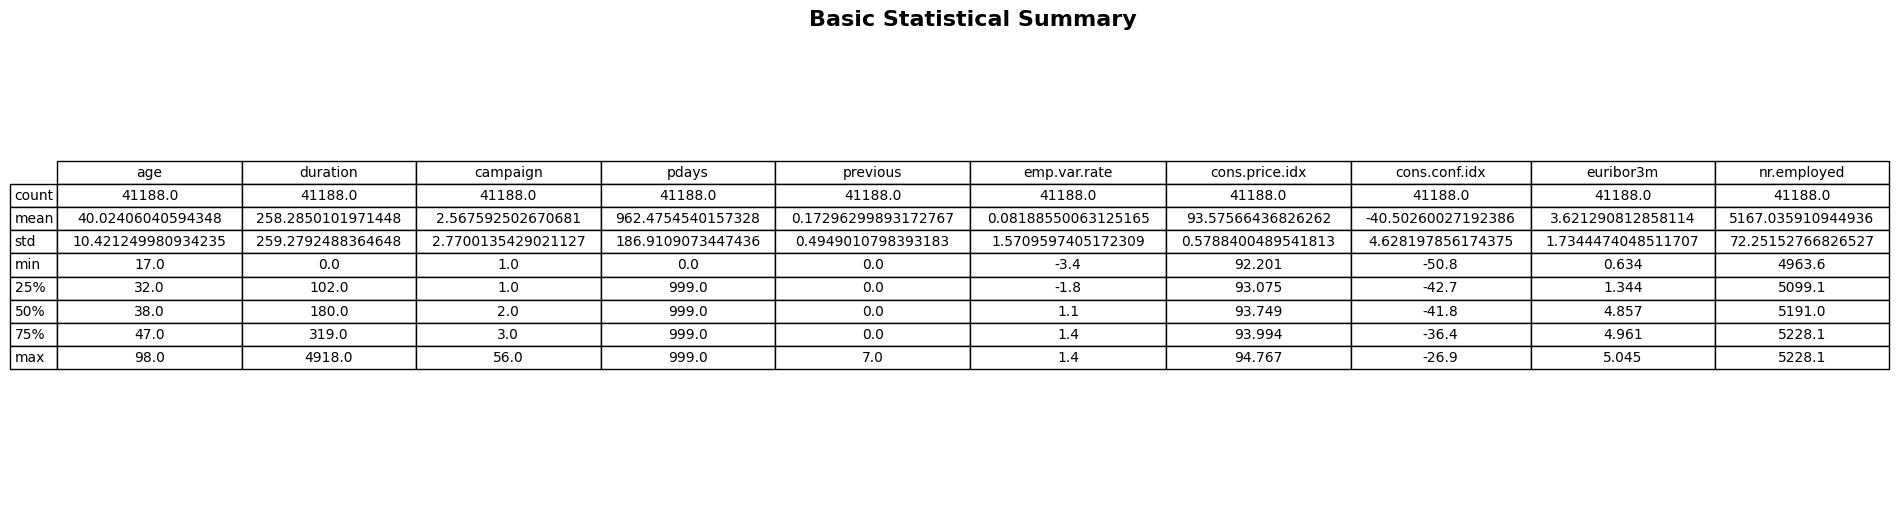

In [62]:
data = pd.read_csv("CleanedDataset.csv")

# Statistical summary
summary = data.describe()

# Table
plt.figure(figsize=(12, 6))
plt.axis('off')
plt.title("Basic Statistical Summary", fontsize=16, fontweight='bold')
table = plt.table(
    cellText=summary.values,
    colLabels=summary.columns,
    rowLabels=summary.index,
    cellLoc='center',
    loc='center',
    colLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(summary.columns))))
for key, cell in table.get_celld().items():
    cell.set_height(0.05)
plt.show()

# **Data Visualisation**

## **Data distribution**

### **Categorical columns**

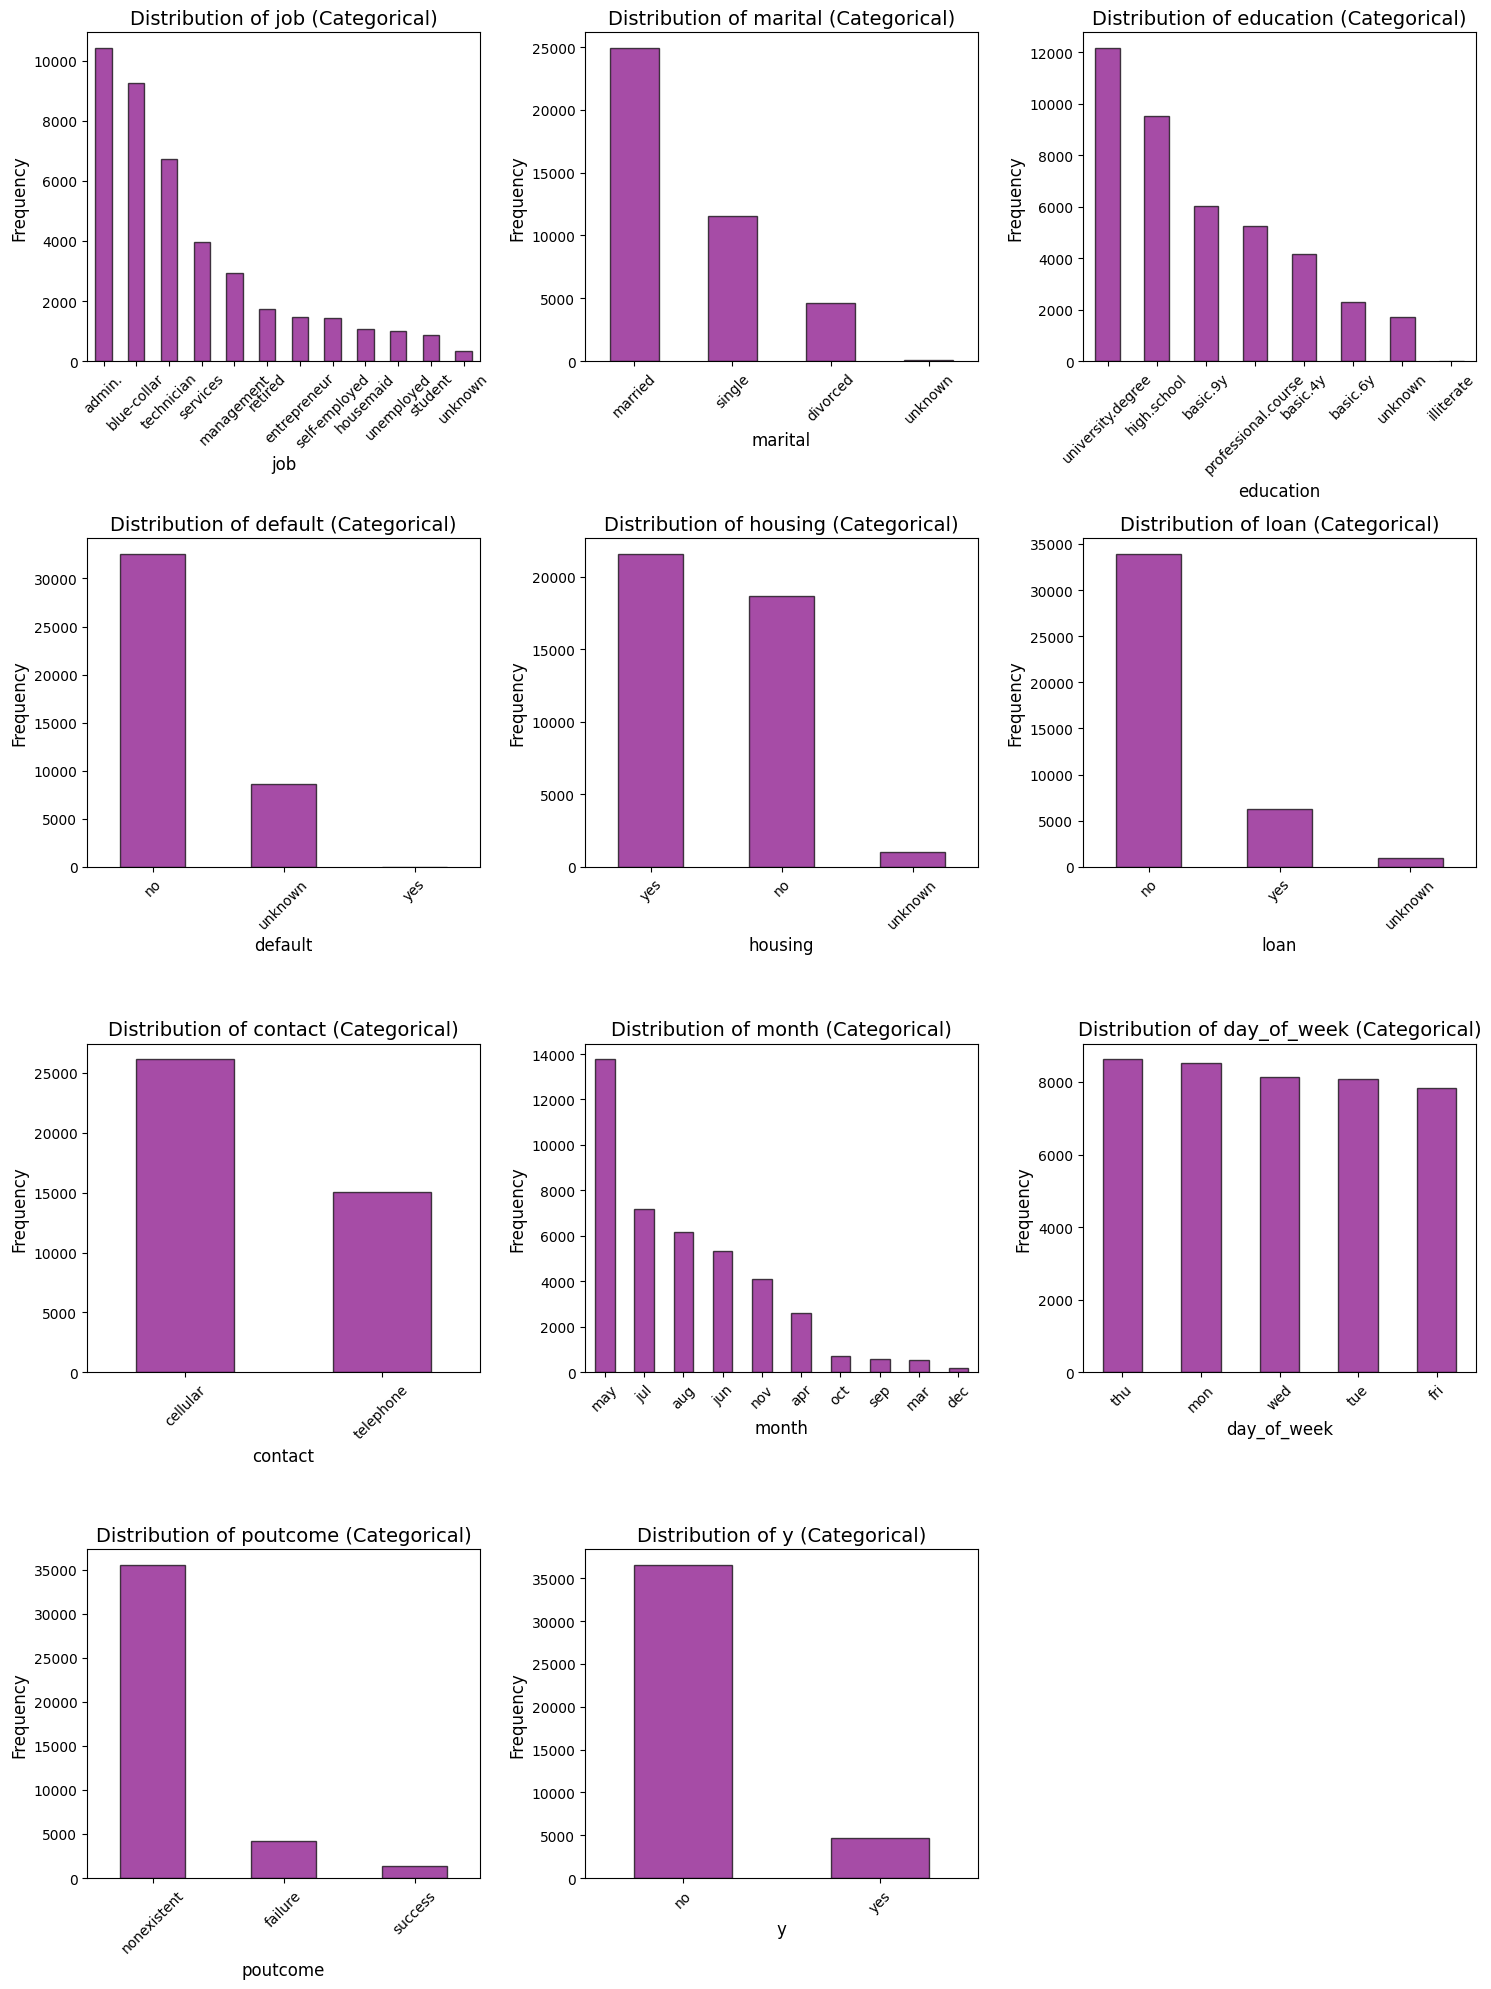

In [63]:
data = pd.read_csv('CleanedDataset.csv')

categorical_columns = data.select_dtypes(include=['object', 'category']).columns

num_columns = 3
num_rows = (len(categorical_columns) // num_columns) + (len(categorical_columns) % num_columns > 0)

# Subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
axes = axes.flatten()

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    ax = axes[i]  # Select the appropriate subplot
    # Plot bar graph for categorical data
    data[column].value_counts().plot(kind='bar', color='purple', edgecolor='black', alpha=0.7, ax=ax)
    # Adding title and labels
    ax.set_title(f'Distribution of {column} (Categorical)', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
for i in range(len(categorical_columns), len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

### **Numerical columns**

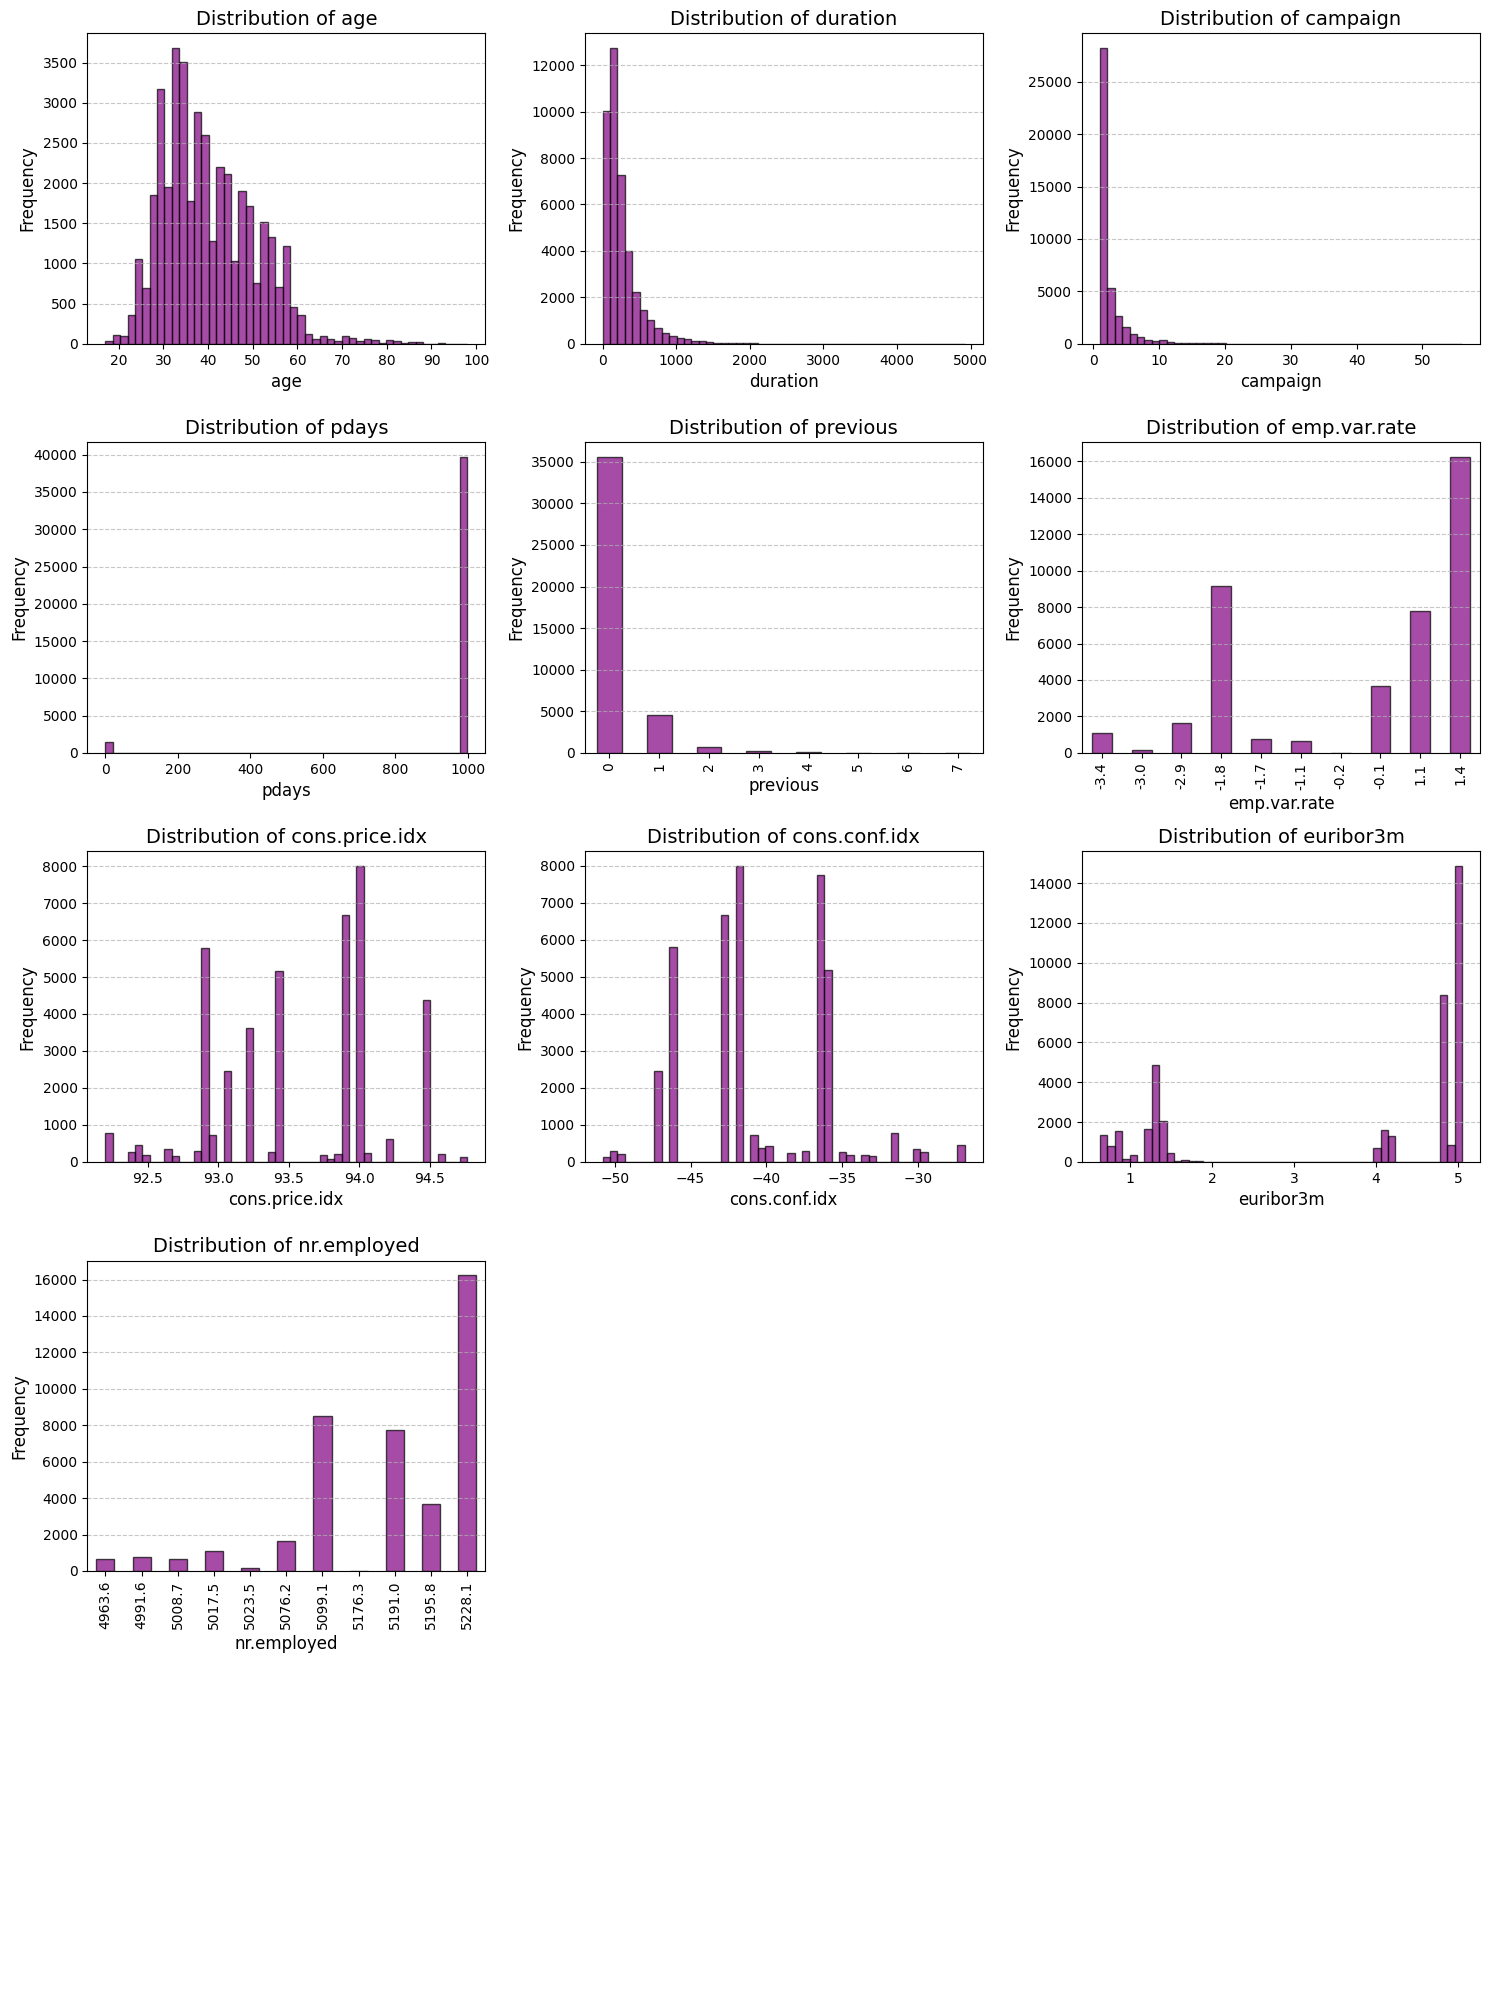

In [64]:
# Load your dataset (update the file path as needed)
data = pd.read_csv('CleanedDataset.csv')

# Define numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot bar graphs for numerical columns with three graphs in one row
fig, axes = plt.subplots(nrows=(len(numerical_columns) + 1) // 2, ncols=3, figsize=(15, (len(numerical_columns) + 1) // 2 * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    ax = axes[i]
    if data[col].nunique() > 20:  # If there are too many unique values, use binning
        bins = np.linspace(data[col].min(), data[col].max())
        data[col].plot(kind='hist', bins=bins, color='purple', edgecolor='black', alpha=0.7, ax=ax)
        ax.set_title(f"Distribution of {col}", fontsize=14)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)
    else:
        data[col].value_counts().sort_index().plot(kind='bar', color='purple', edgecolor='black', alpha=0.7, ax=ax)
        ax.set_title(f"Distribution of {col}", fontsize=14)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hide any remaining empty subplots
for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent overlap and make subplots shorter
plt.tight_layout()
plt.show()


## **Data distribution respect to y**

### **Categorical columns**

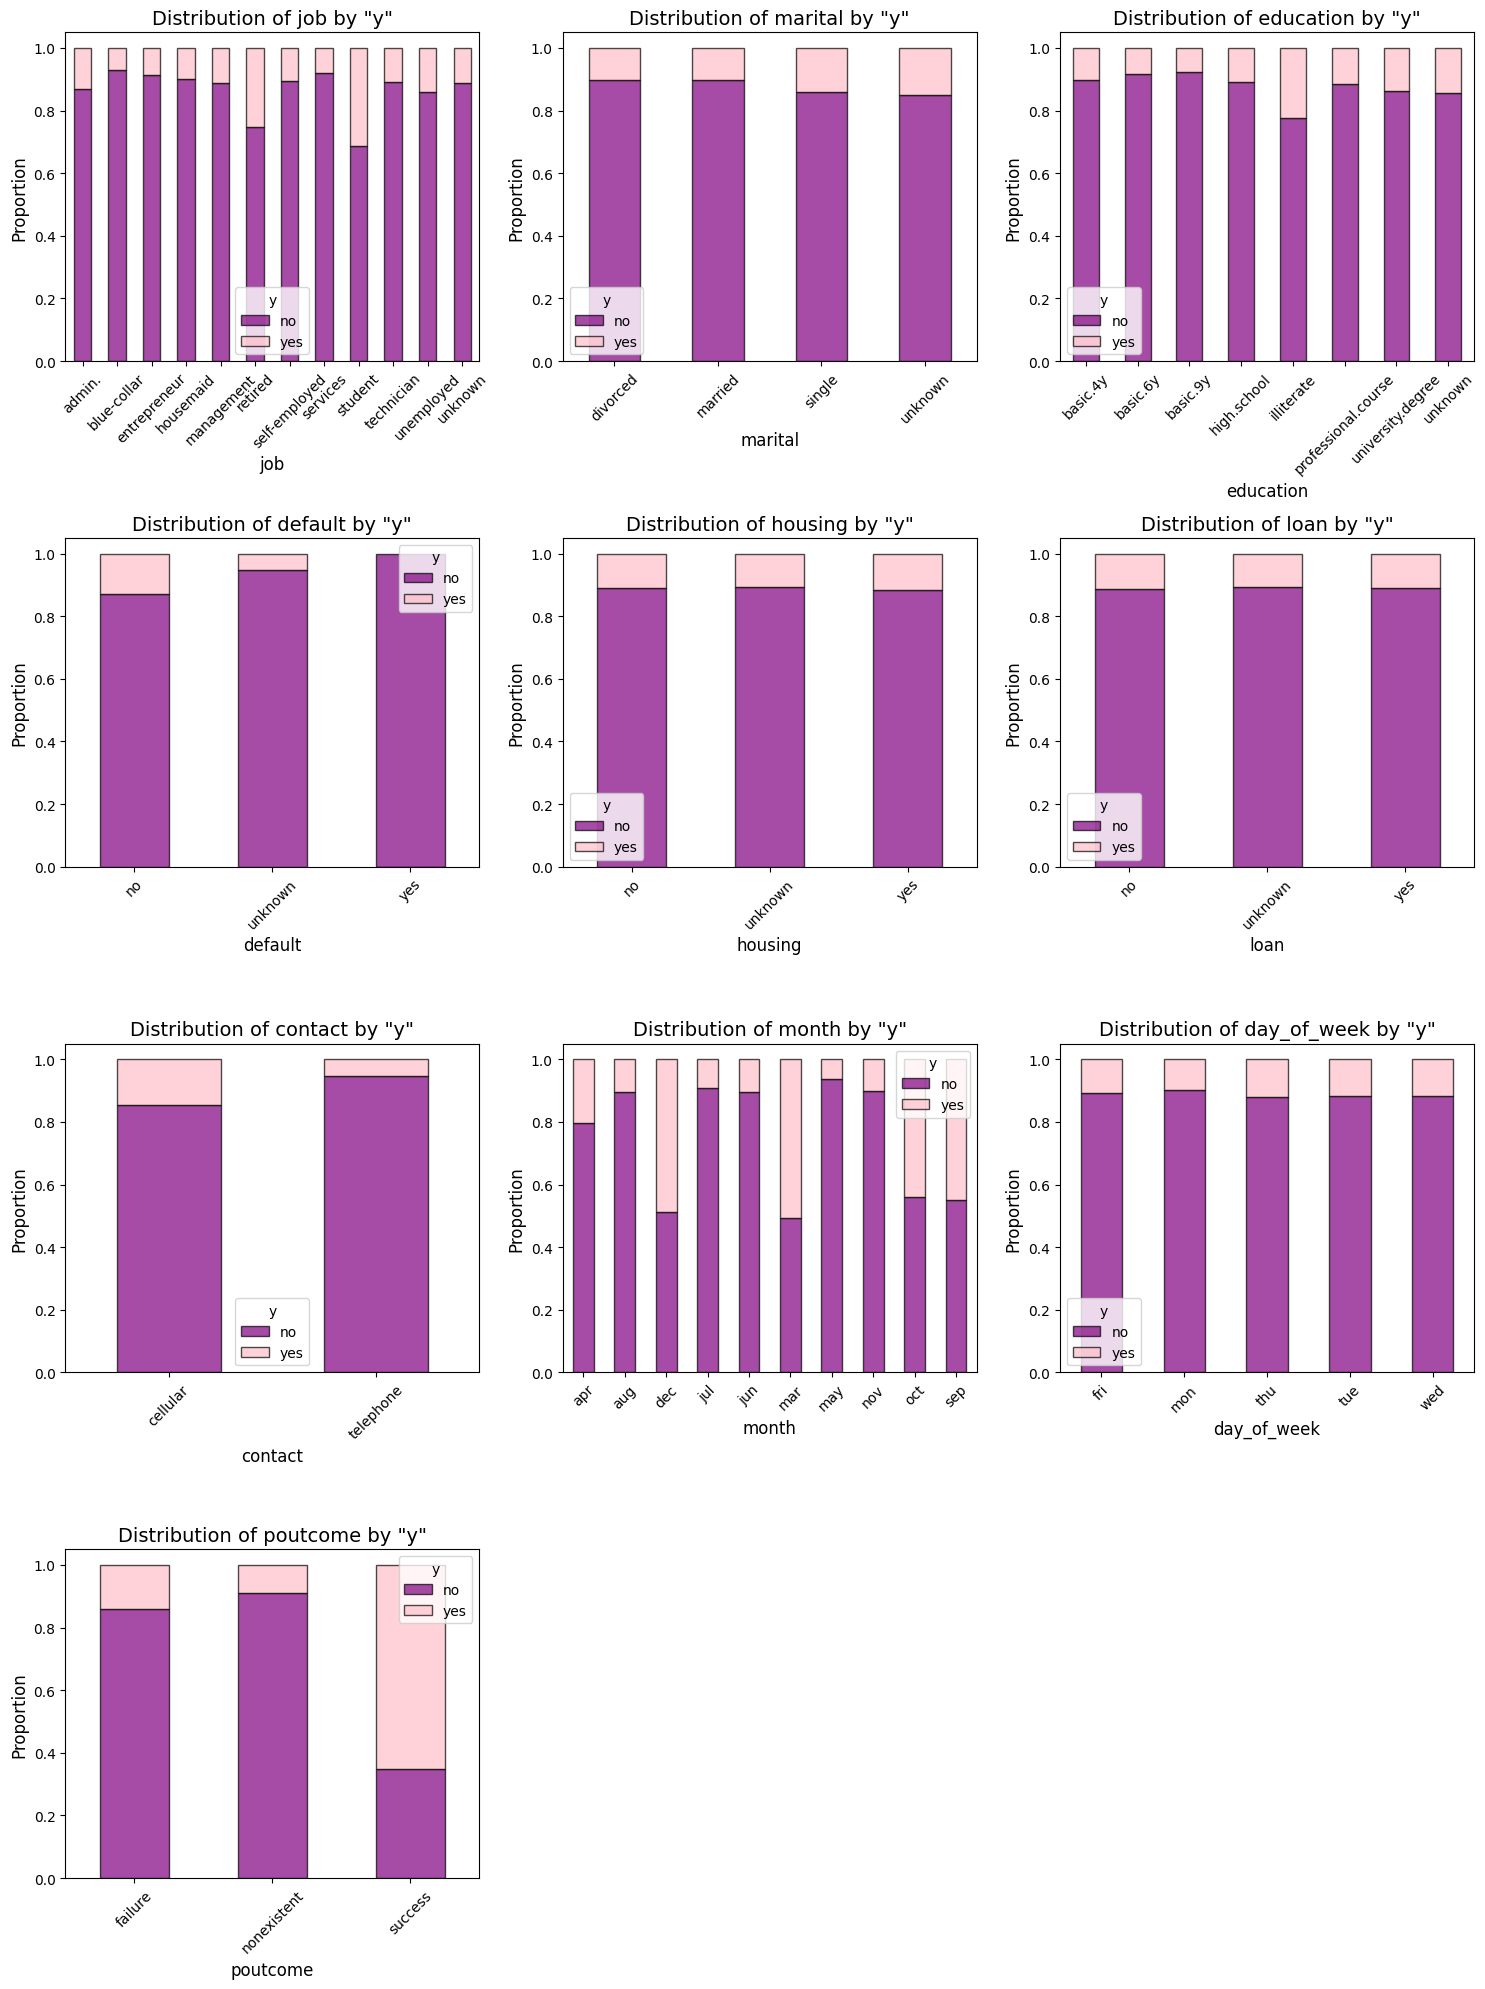

In [65]:
# Load your dataset
df = pd.read_csv('CleanedDataset.csv')

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Exclude the target column "y" from being plotted as a categorical variable
categorical_columns = categorical_columns.drop("y")

num_columns = 3
num_rows = (len(categorical_columns) // num_columns) + (len(categorical_columns) % num_columns > 0)

# Subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    ax = axes[i]  # Select the appropriate subplot
    cross_tab = pd.crosstab(df[column], df["y"], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, color=['purple', 'pink'], edgecolor='black', alpha=0.7, ax=ax)
    ax.set_title(f'Distribution of {column} by "y"', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Proportion', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

### **Numeric columns**

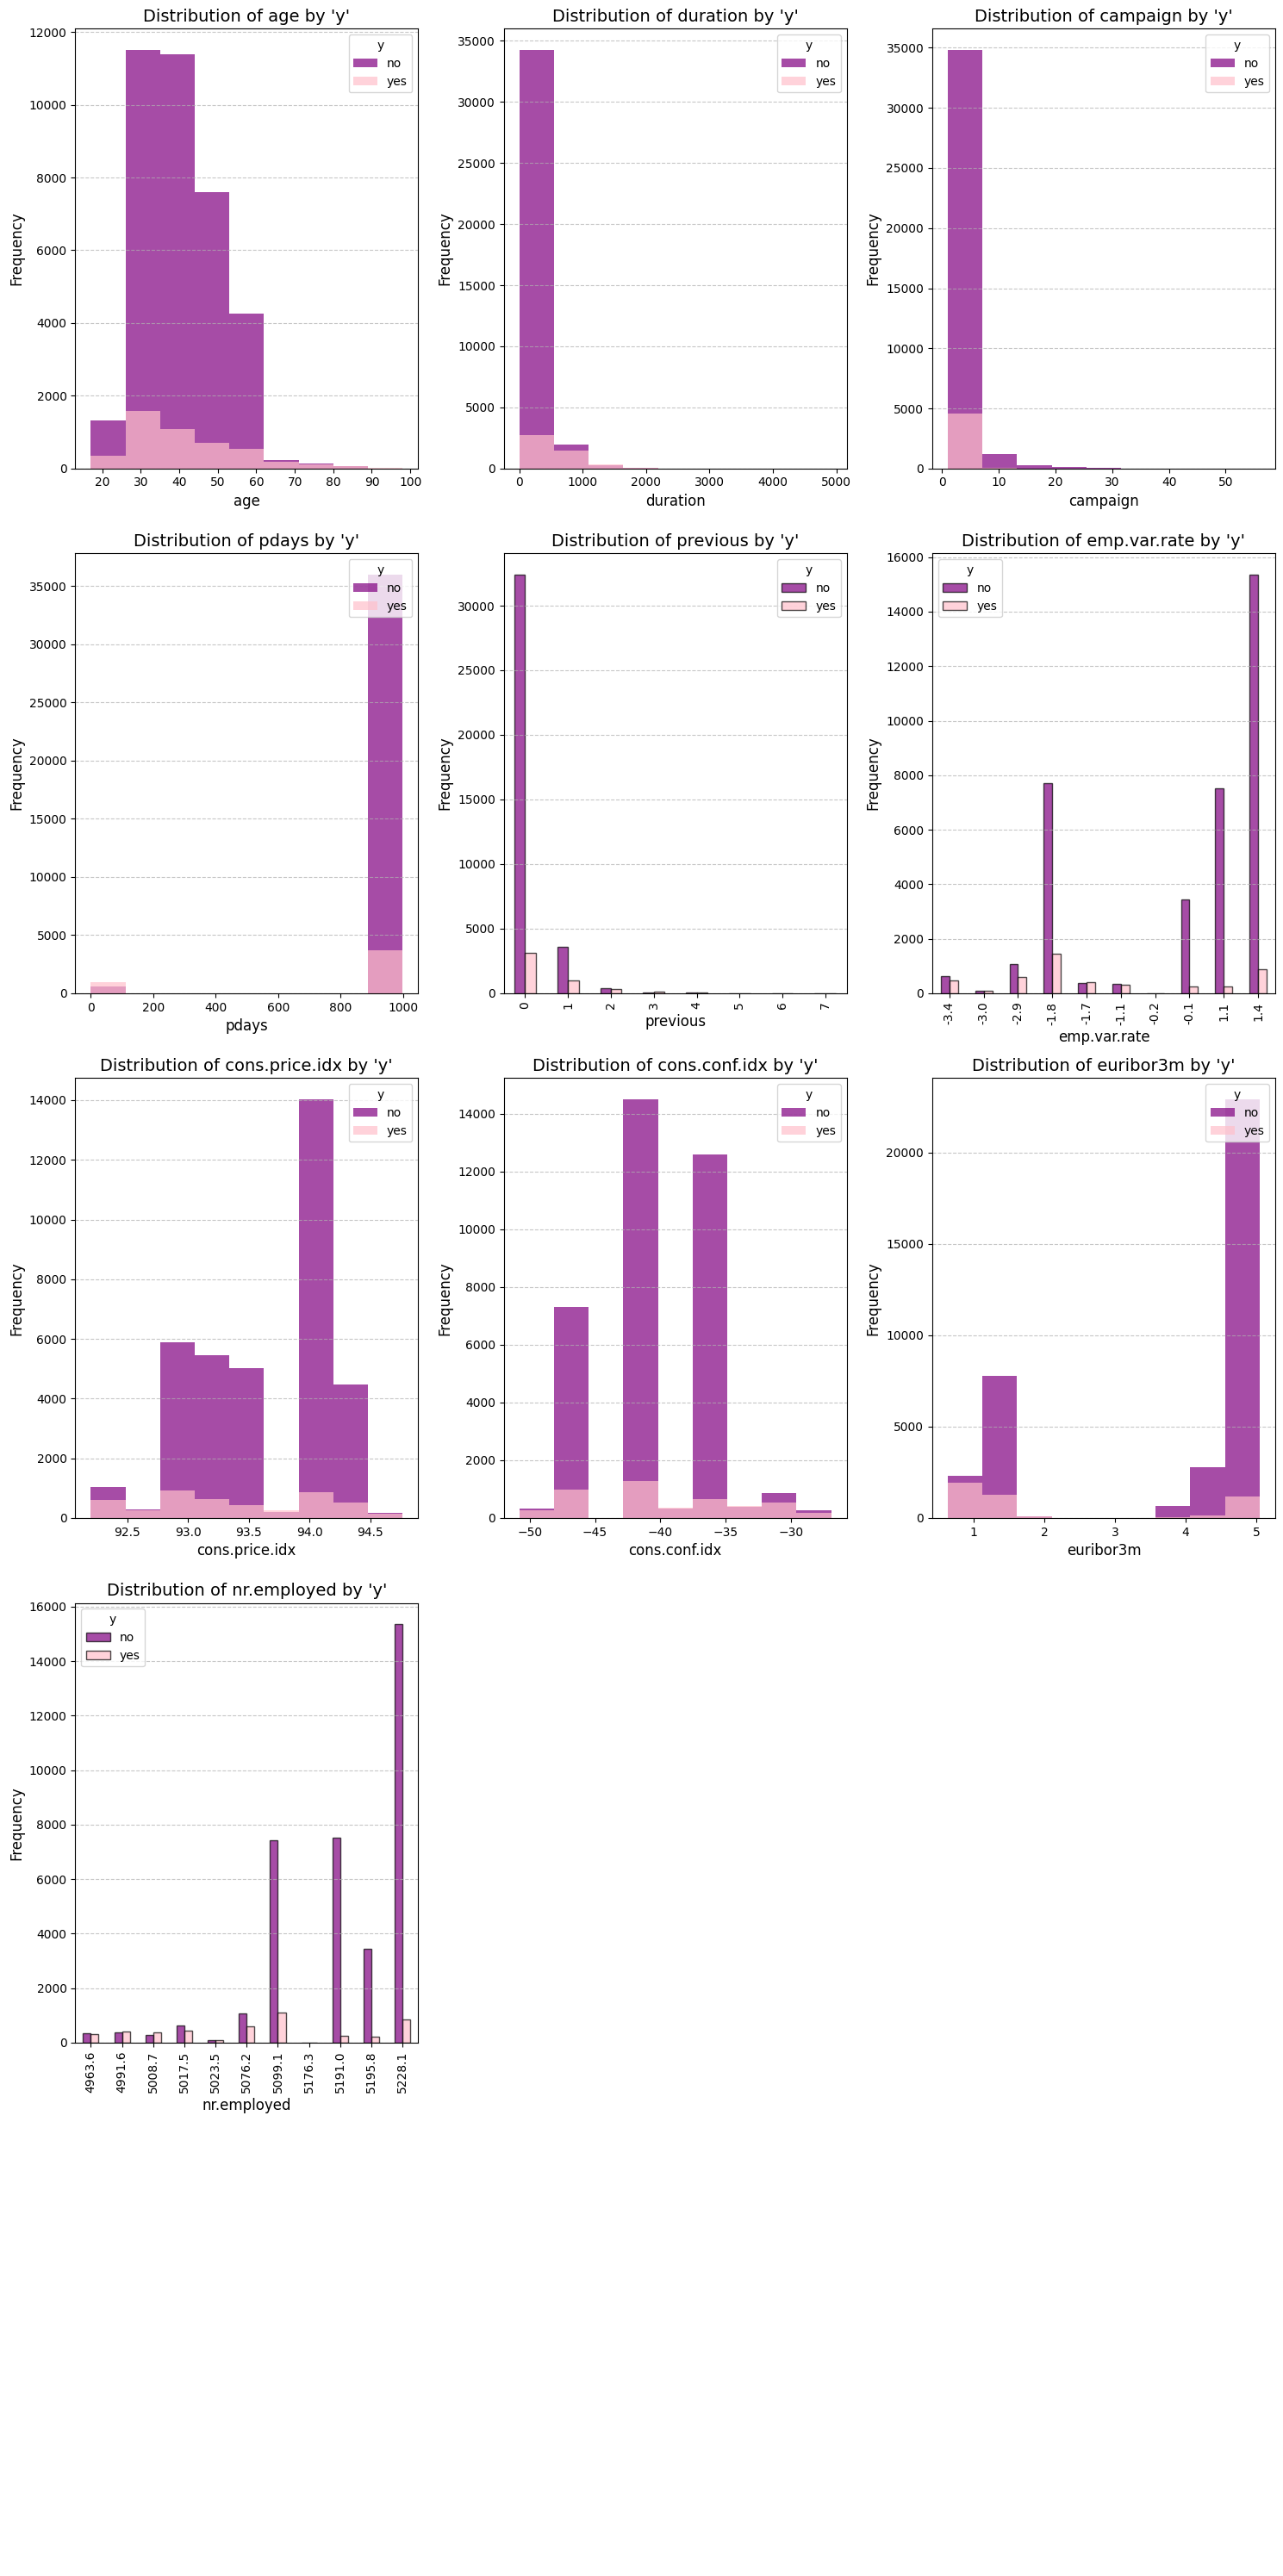

In [66]:
# Load your dataset
data = pd.read_csv('CleanedDataset.csv')

# Define numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot bar graphs for numerical columns with respect to "y"
fig, axes = plt.subplots(nrows=(len(numerical_columns) + 1) // 2, ncols=3, figsize=(15, 30))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    ax = axes[i]

    # Check if the column has many unique values (for binning)
    if data[col].nunique() > 20:
        bins = np.linspace(data[col].min(), data[col].max(), 10)
        colors = {'no': 'purple', 'yes': 'pink'}
        for label in data['y'].unique():
            subset = data[data['y'] == label]
            ax.hist(subset[col], bins=bins, color=colors.get(label, 'blue'), alpha=0.7, label=f'{label}')
        ax.set_title(f"Distribution of {col} by 'y'", fontsize=14)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)
        ax.legend(title='y', loc='upper right')
    else:
        grouped = data.groupby([col, 'y']).size().unstack(fill_value=0)
        grouped.plot(kind='bar', stacked=False, ax=ax, color=['purple', 'pink'], edgecolor='black', alpha=0.7)
        ax.set_title(f"Distribution of {col} by 'y'", fontsize=14)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)

    ax.grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# **Handle null/missing values**

In [67]:
data = pd.read_csv('CleanedDataset.csv')

# Check for null values
nullValues = data.isnull().sum()
# Display null value count
print("Null values in each column:")
print(nullValues)

Null values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


# **Handle duplicates**

## **Check for duplicate rows**

In [68]:
data = pd.read_csv("CleanedDataset.csv")

# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 12
Duplicate rows found:
       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      

## **Remove duplicate rows**

In [69]:
# Remove duplicate rows
data = data.drop_duplicates()
print("Duplicate rows removed.")

data.to_csv("CleanedDataset.csv", index=False)
print("Updated dataset saved to CleanedDataset.csv.")

Duplicate rows removed.
Updated dataset saved to CleanedDataset.csv.


# **Check correlations**

## **Inercorrelations**

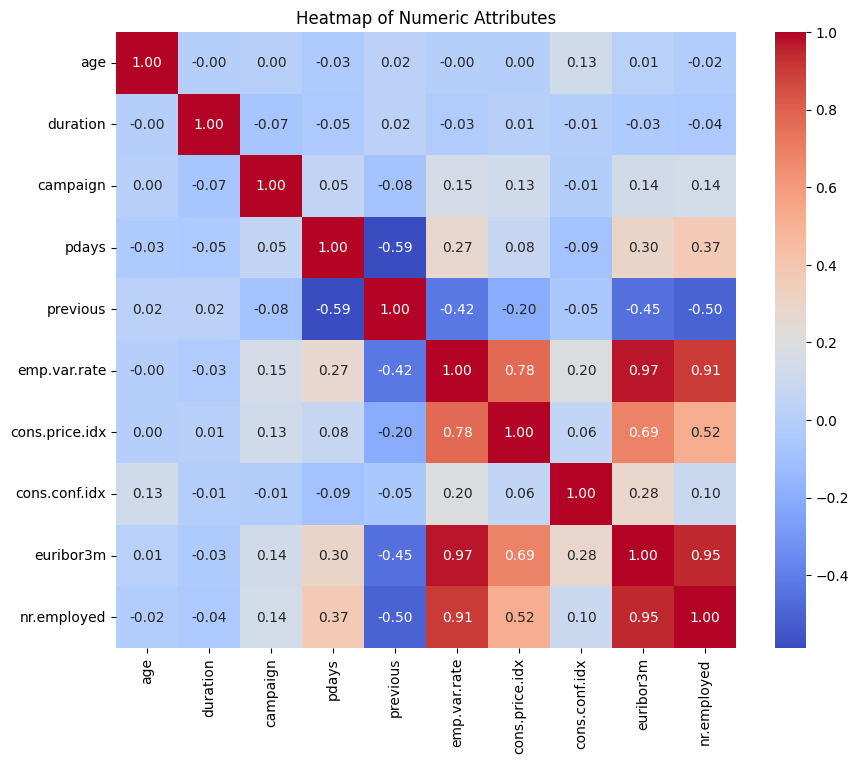

In [70]:
data = pd.read_csv('CleanedDataset.csv')

# Select numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
correlation_matrix = numeric_columns.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap of Numeric Attributes")
plt.show()

## **Correlations with y**

<ipython-input-71-ea4d4c71d8d7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="coolwarm")


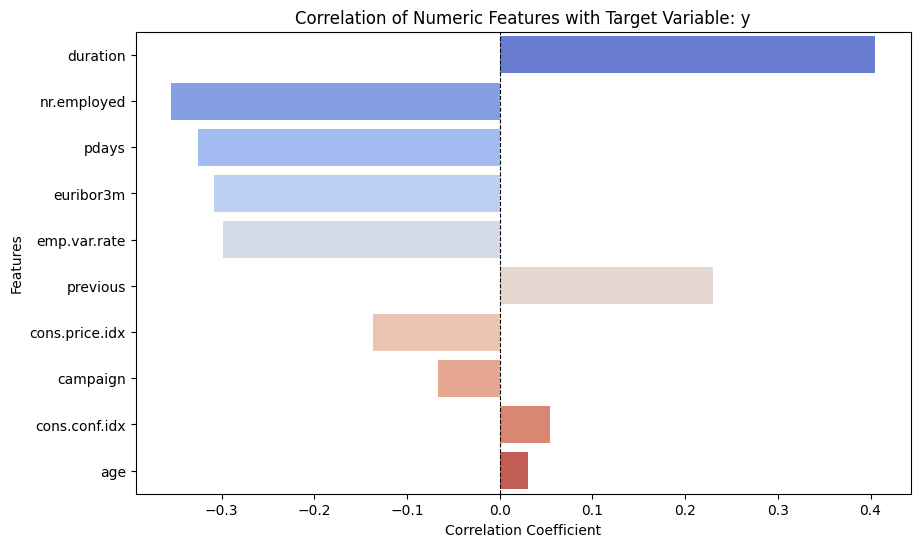

In [71]:
le = LabelEncoder()
target = 'y'
data['y'] = le.fit_transform(data[target])
numeric_columns = data.select_dtypes(include=['number']).columns
correlation_with_target = data[numeric_columns].corr()[target].drop(target)

# Sort the correlations by absolute value for better visualization
correlation_with_target = correlation_with_target.sort_values(key=abs, ascending=False)

# Visualize the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="coolwarm")
plt.title(f"Correlation of Numeric Features with Target Variable: {target}")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.axvline(x=0, color="black", linestyle="--", linewidth=0.8)  # Optional: Add a vertical line at zero
plt.show()

# **Dimentional Reduction**

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
file_path = "CleanedDataset.csv"  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Step 2: Select the 5 columns for PCA
columns_to_apply_pca = ['euribor3m', 'nr.employed', 'emp.var.rate', 'cons.price.idx']  # Replace with actual column names
data_for_pca = data[columns_to_apply_pca]

# Step 3: Standardize the data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Step 4: Apply PCA
pca = PCA(n_components=3)  # Choose the number of components you want (e.g., 3)
principal_components = pca.fit_transform(scaled_data)

# Step 5: Create a DataFrame for the principal components
pca_columns = [f"PC{i+1}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(data=principal_components, columns=pca_columns)

# Step 6: Merge the principal components back into the original dataset
data = data.drop(columns=columns_to_apply_pca)  # Drop the original columns
data = pd.concat([data, pca_df], axis=1)  # Add the principal components

# Step 7: Save the updated dataset to a new CSV file
output_path = "pca.csv"
data.to_csv(output_path, index=False)
print(f"Updated dataset with PCA saved to {output_path}")

# Optional: View explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


Updated dataset with PCA saved to pca.csv
Explained variance ratio: [0.8568554  0.12930589 0.00913742]


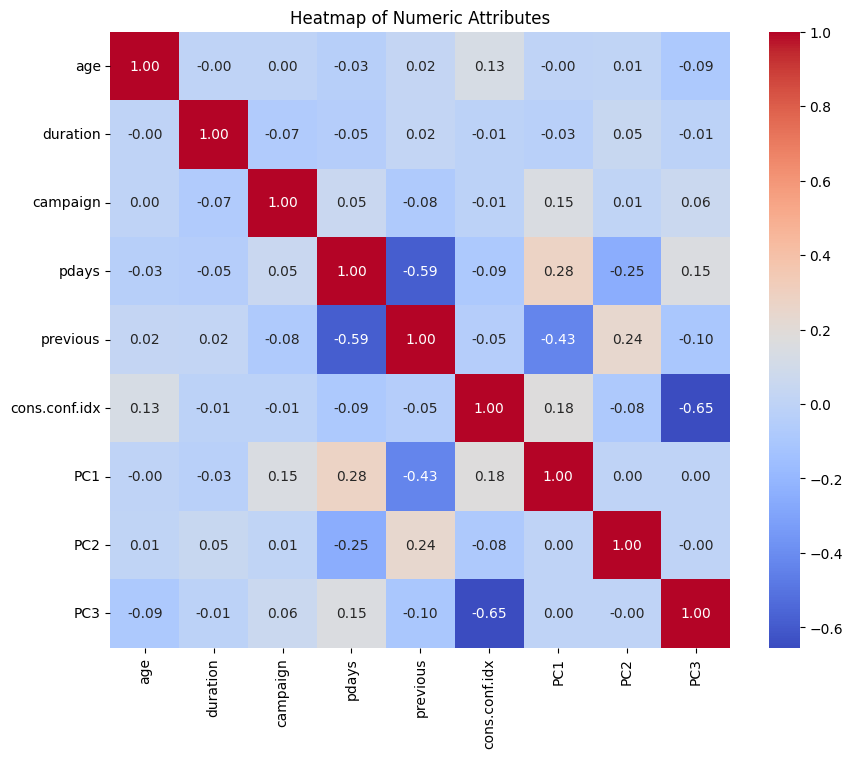

In [73]:
data = pd.read_csv('pca.csv')

# Select numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
correlation_matrix = numeric_columns.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap of Numeric Attributes")
plt.show()

# **Feature importance**

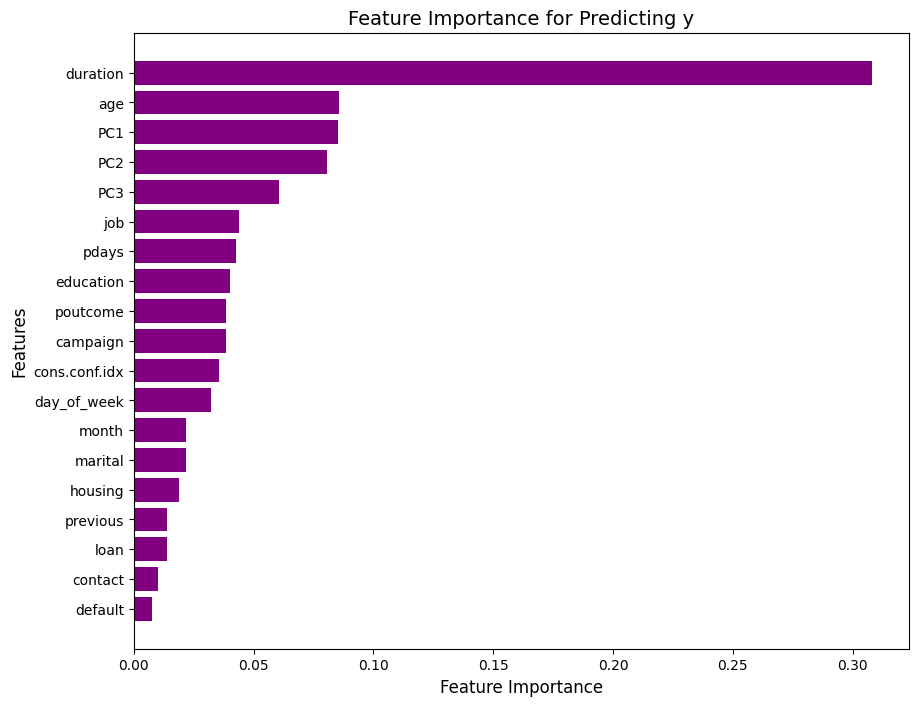

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data = pd.read_csv('pca.csv')

# Do a label encoding to train a random forest
label_encoders = {}
data_encoded = data.copy()
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data_encoded.drop(columns=['y'])
y = data_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Get feature importances
importances = rf.feature_importances_
features = X.columns
# Sort features
indices = np.argsort(importances)[::-1]
features_sorted = features[indices]
importances_sorted = importances[indices]

# Display
plt.figure(figsize=(10, 8))
plt.barh(features_sorted, importances_sorted, color='purple')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance for Predicting y', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# **Feature Selection**

In [75]:
data = pd.read_csv('pca.csv')

# Drop unnecessary columns
data = data.drop(columns=['duration', 'contact', 'default'])

# Save the updated dataset to a new CSV file
data.to_csv('DatasetDropped.csv', index=False)

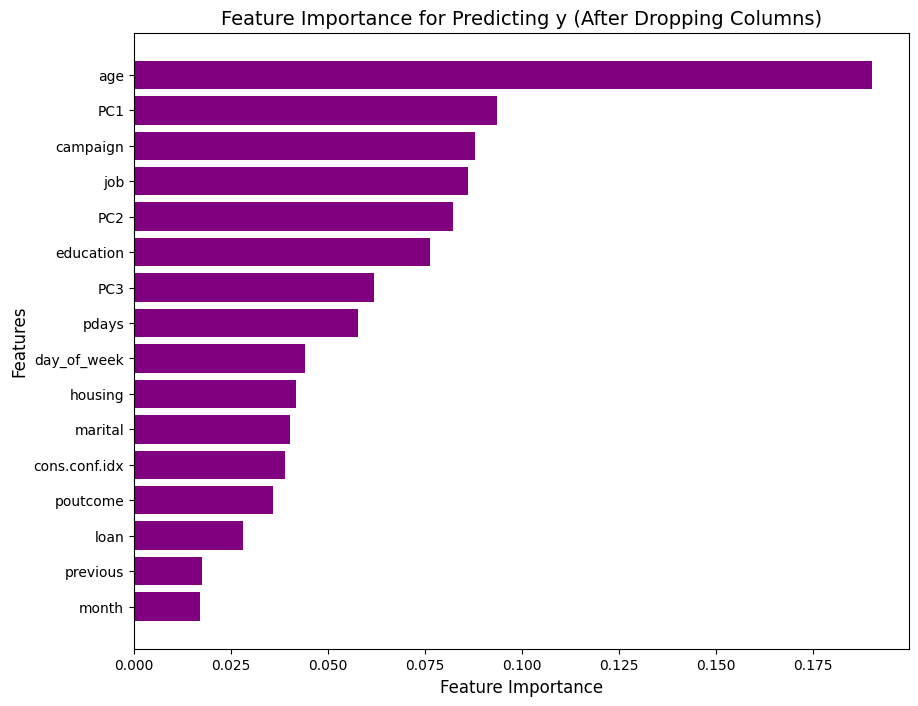

In [76]:
data = pd.read_csv('DatasetDropped.csv')
# Do a label encoding for train a random forest
label_encoders = {}
data_encoded = data.copy()
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data_encoded.drop(columns=['y'])
y = data_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model for get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Get feature importances
importances = rf.feature_importances_
features = X.columns
# Sort by importance
indices = np.argsort(importances)[::-1]
features_sorted = features[indices]
importances_sorted = importances[indices]

# Display
plt.figure(figsize=(10, 8))
plt.barh(features_sorted, importances_sorted, color='purple')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance for Predicting y (After Dropping Columns)', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# **Handle Outliers**

## **Check outliers**

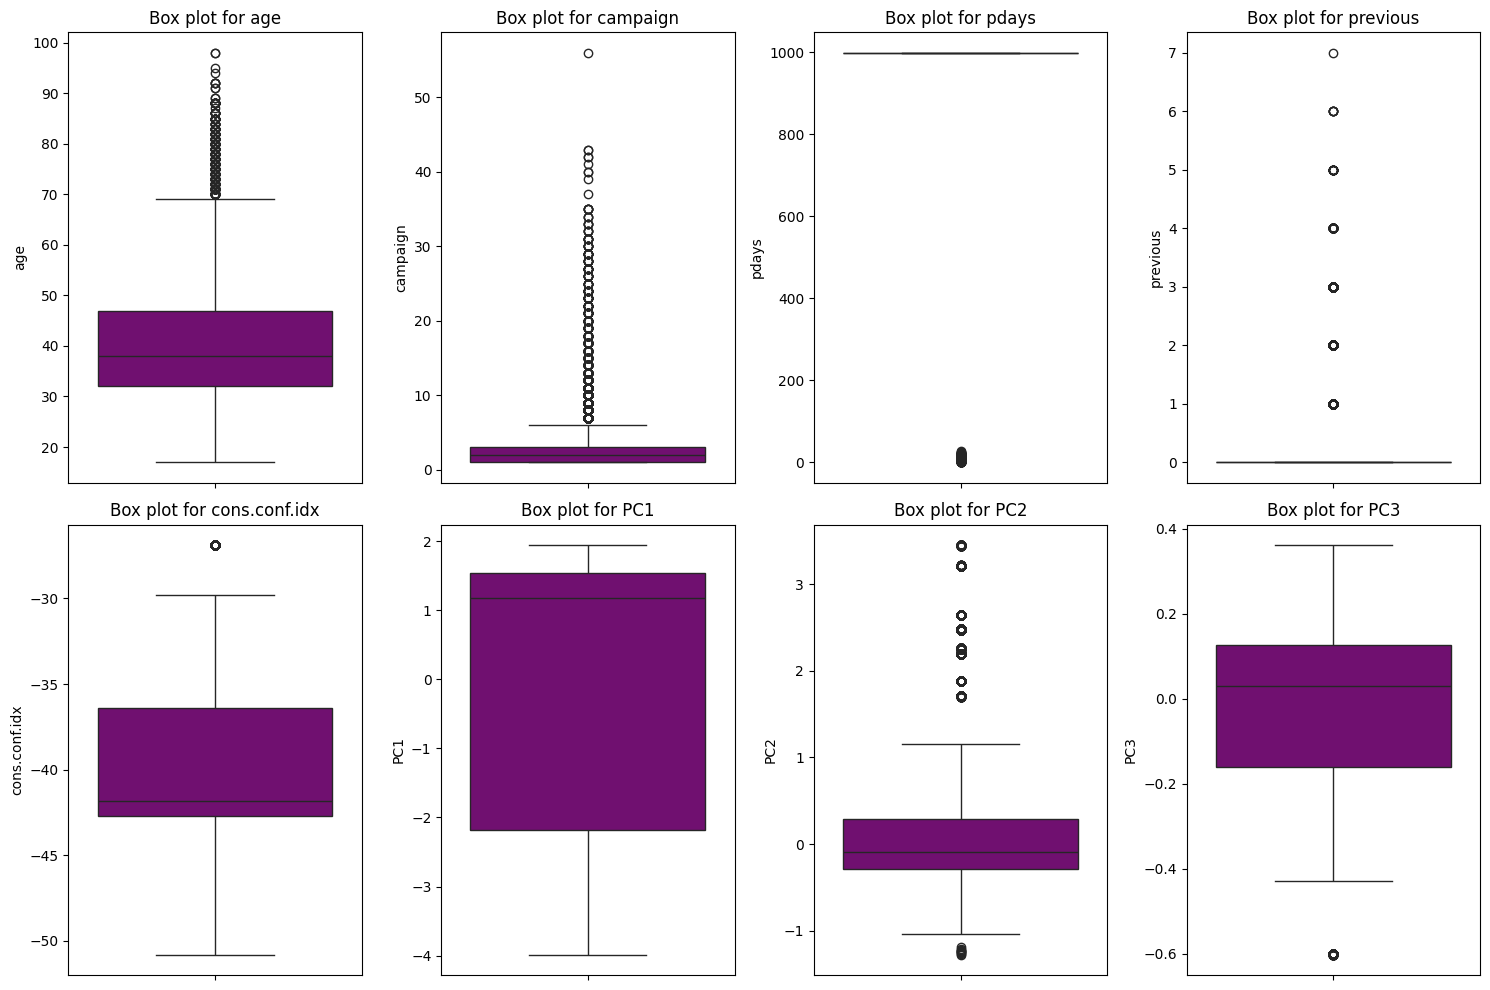

In [77]:
data = pd.read_csv('DatasetDropped.csv')

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows needed to fit all subplots
num_columns = 4
num_rows = (len(numerical_columns) // num_columns) + (len(numerical_columns) % num_columns > 0)

# Set up the plot
plt.figure(figsize=(15, num_rows * 5))

# Create a box plot for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)  # Arrange plots in a grid with 4 columns
    sns.boxplot(data=data[column], color='purple')
    plt.title(f"Box plot for {column}")
    plt.tight_layout()

# Show the plot
plt.show()

In [78]:
columns_to_analyze = ['age', 'campaign', 'cons.conf.idx']

# Function to detect outliers based on IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return lower_bound, upper_bound, outliers

# Analyze the selected columns
for column_name in columns_to_analyze:
    col_data = data[column_name]
    lower_bound, upper_bound, outliers = detect_outliers(col_data)
    print(f"Column: {column_name}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {len(outliers)}")
    print("-"*50)

Column: age
Lower Bound: 9.5
Upper Bound: 69.5
Number of Outliers: 468
--------------------------------------------------
Column: campaign
Lower Bound: -2.0
Upper Bound: 6.0
Number of Outliers: 2406
--------------------------------------------------
Column: cons.conf.idx
Lower Bound: -52.150000000000006
Upper Bound: -26.949999999999992
Number of Outliers: 446
--------------------------------------------------


## **Handle outliers with capping**

In [79]:
# List of column names to apply capping
cols_cap = ['age', 'campaign', 'cons.conf.idx']

# Apply capping to the specified columns
for col in cols_cap:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    # Apply capping
    data[col] = data[col].clip(lower=lower_cap, upper=upper_cap)

data.to_csv("Capped.csv", index=False)
print("Capping applied successfully. The modified dataset has been saved to: Capped.csv")

Capping applied successfully. The modified dataset has been saved to: Capped.csv


## **Visualize capped columns**

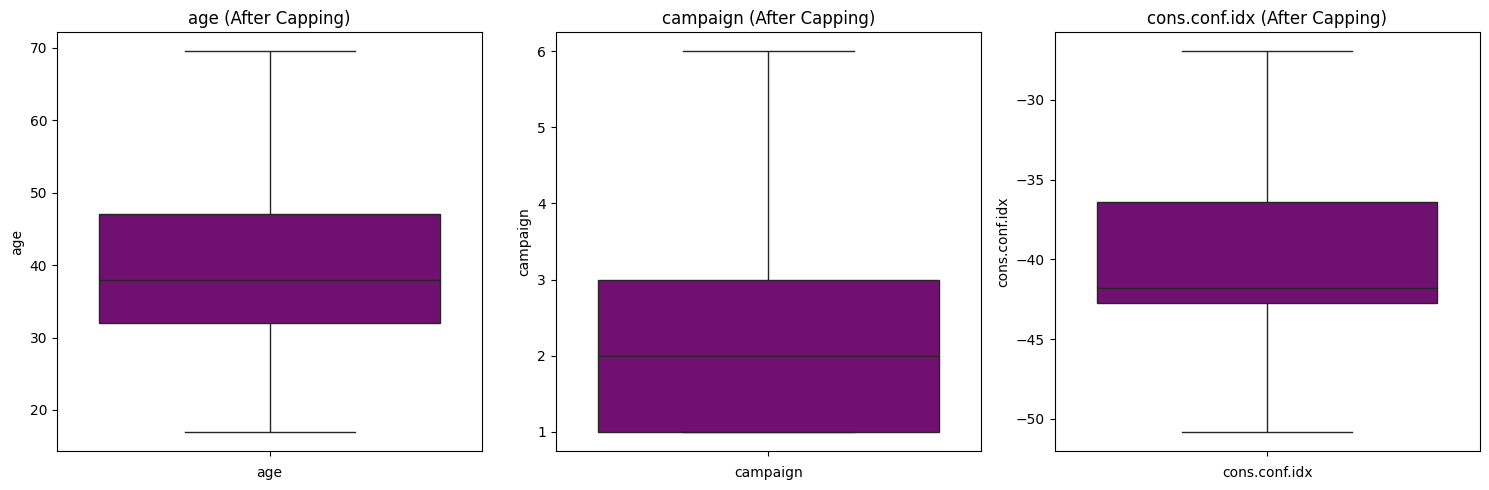

In [80]:
df = pd.read_csv('Capped.csv')

# Columns to visualize
cols_plot = ['age', 'campaign', 'cons.conf.idx']

# Create boxplots to visualize
plt.figure(figsize=(15, 5))
for i, column in enumerate(cols_plot):
    plt.subplot(1, len(cols_plot), i + 1)
    sns.boxplot(data=df[column], color='purple')
    plt.title(f'{column} (After Capping)')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

# **Encodeing**

In [81]:
data = pd.read_csv('Capped.csv')

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
# One-hot encoding
encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
# Replace boolean values with 1 / 0
encoded_data[encoded_data.columns[encoded_data.dtypes == 'bool']] = encoded_data[encoded_data.columns[encoded_data.dtypes == 'bool']].astype(int)

# Make pdays column as a binary column
encoded_data['prev_cont'] = encoded_data['pdays'].replace(999, 0).apply(lambda x: 1 if x != 0 else x)
encoded_data = encoded_data.drop(columns=['pdays'])

# Rename the 'y_yes' column to 'y'
encoded_data = encoded_data.rename(columns={'y_yes': 'y'})
# Move the 'y' column to the end
cols = [col for col in encoded_data if col != 'y'] + ['y']
encoded_data = encoded_data[cols]

encoded_data.head()
encoded_data.to_csv('Encoded.csv', index=False)

# **Feature scaling**

In [82]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("Encoded.csv")

# Continuous numerical features
numerical_features = ['age', 'campaign', 'previous', 'cons.conf.idx', 'PC1', 'PC2', 'PC3']

# Create a copy of the dataset to scale
scaled_data = data.copy()
# Apply StandardScaler
scaler = StandardScaler()
scaled_data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(scaled_data.head())
scaled_data.to_csv('Scaled.csv', index=False)

        age  campaign  previous  cons.conf.idx       PC1       PC2      PC3  \
0  1.585672 -0.822576 -0.349551        0.88699  0.648062  0.408469 -0.83811   
1  1.684402 -0.822576 -0.349551        0.88699  0.648062  0.408469 -0.83811   
2 -0.290190 -0.822576 -0.349551        0.88699  0.648062  0.408469 -0.83811   
3  0.005999 -0.822576 -0.349551        0.88699  0.648062  0.408469 -0.83811   
4  1.585672 -0.822576 -0.349551        0.88699  0.648062  0.408469 -0.83811   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_oct  \
0                0                 0              1  ...          0   
1                0                 0              0  ...          0   
2                0                 0              0  ...          0   
3                0                 0              0  ...          0   
4                0                 0              0  ...          0   

   month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0                1  

# **Check Duplicates**

# **Shuffle the dataset**

In [83]:
data = pd.read_csv("Scaled.csv")
shuffled = data.sample(frac=1).reset_index(drop=True)

shuffled.to_csv("BankDataset.csv", index=False)
print("Dataset shuffled successfully.")

Dataset shuffled successfully.


# **Check class inbalance**

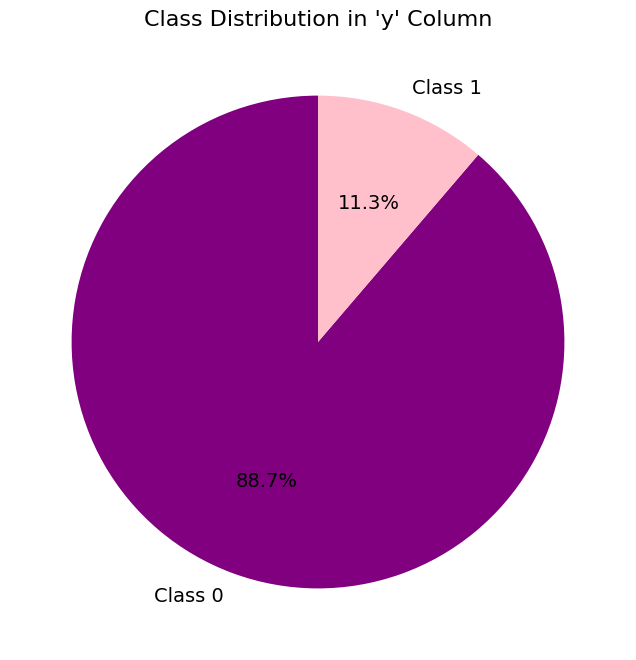

In [56]:
data = pd.read_csv("Scaled.csv")

# Counts
counts = data["y"].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
counts.plot.pie(
    labels=["Class 0", "Class 1"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["purple", "pink"],
    textprops={"fontsize": 14}
)
plt.title("Class Distribution in 'y' Column", fontsize=16)
plt.ylabel("")
plt.show()